In [19]:
import requests
from bs4 import BeautifulSoup
import bs4
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import time
import json
import seaborn as sns
import sqlite3

In [30]:
icon = sqlite3.connect('imdb_data.db')
icur = icon.cursor()

tcon = sqlite3.connect('tmdb_data.db')
tcur = tcon.cursor()


In [35]:
dfi = pd.read_sql_query('''SELECT * FROM imdb;''', icon)
dfi

,title,year,genre,runtime,category,votes,imdb_rating
0,The Dark Knight,2008,"Action, Crime, Drama",152,PG-13,2033604,9.0
1,Iron Man,2008,"Action, Adventure, Sci-Fi",126,PG-13,841289,7.9
2,The Incredible Hulk,2008,"Action, Adventure, Sci-Fi",112,PG-13,390975,6.8
3,Twilight,2008,"Drama, Fantasy, Romance",122,PG-13,390586,5.2
4,Bedtime Stories,2008,"Comedy, Family, Fantasy",99,PG,81622,6.1
5,Gran Torino,2008,Drama,116,R,663704,8.1
6,Forgetting Sarah Marshall,2008,"Comedy, Drama, Romance",111,R,245886,7.2
7,The Spiderwick Chronicles,2008,"Action, Adventure, Drama",96,PG,80643,6.6
8,Mamma Mia!,2008,"Comedy, Musical, Romance",108,PG-13,189836,6.4
9,Wanted,2008,"Action, Crime, Fantasy",110,R,337300,6.7


In [33]:
dft = pd.read_sql_query('''SELECT * FROM tmdb_movies;''', tcon)
dft

,title,budget,revenue,profit,directors,release_date
0,The Dark Knight,185000000,1004558444,819558444,Christopher Nolan,2008-07-16
1,Indiana Jones and the Kingdom of the Crystal S...,185000000,786636033,601636033,Steven Spielberg,2008-05-21
2,Kung Fu Panda,130000000,631744560,501744560,Mark Osborne,2008-06-04
3,Hancock,150000000,624029371,474029371,Peter Berg,2008-07-01
4,Mamma Mia!,52000000,609841637,557841637,Phyllida Lloyd,2008-07-02
5,Madagascar: Escape 2 Africa,150000000,603900354,453900354,Eric Darnell,2008-10-30
6,Quantum of Solace,200000000,586090727,386090727,Marc Forster,2008-10-30
7,Iron Man,140000000,585174222,445174222,Jon Favreau,2008-04-30
8,WALL·E,180000000,521311860,341311860,Andrew Stanton,2008-06-22
9,Sex and the City,65000000,415252786,350252786,Michael Patrick King,2008-05-12


In [37]:
dfjoin = pd.merge(dfi, dft, on="title")
dfjoin

,title,year,genre,runtime,category,votes,imdb_rating,budget,revenue,profit,directors,release_date
0,The Dark Knight,2008,"Action, Crime, Drama",152,PG-13,2033604,9.0,185000000,1004558444,819558444,Christopher Nolan,2008-07-16
1,The Dark Knight,2008,"Action, Crime, Drama",152,PG-13,2033604,9.0,185000000,1004558444,819558444,Christopher Nolan,2008-07-16
2,The Dark Knight,2008,"Action, Crime, Drama",152,PG-13,2033865,9.0,185000000,1004558444,819558444,Christopher Nolan,2008-07-16
3,The Dark Knight,2008,"Action, Crime, Drama",152,PG-13,2033865,9.0,185000000,1004558444,819558444,Christopher Nolan,2008-07-16
4,Iron Man,2008,"Action, Adventure, Sci-Fi",126,PG-13,841289,7.9,140000000,585174222,445174222,Jon Favreau,2008-04-30
5,Iron Man,2008,"Action, Adventure, Sci-Fi",126,PG-13,841289,7.9,140000000,585174222,445174222,Jon Favreau,2008-04-30
6,Iron Man,2008,"Action, Adventure, Sci-Fi",126,PG-13,841428,7.9,140000000,585174222,445174222,Jon Favreau,2008-04-30
7,Iron Man,2008,"Action, Adventure, Sci-Fi",126,PG-13,841428,7.9,140000000,585174222,445174222,Jon Favreau,2008-04-30
8,The Incredible Hulk,2008,"Action, Adventure, Sci-Fi",112,PG-13,390975,6.8,150000000,163712074,13712074,Louis Leterrier,2008-06-12
9,The Incredible Hulk,2008,"Action, Adventure, Sci-Fi",112,PG-13,390975,6.8,150000000,163712074,13712074,Louis Leterrier,2008-06-12


In [223]:
dfjoin = dfjoin.drop_duplicates('title',keep='first')
dfjoin

,title,year,genre,runtime,category,votes,imdb_rating,budget,revenue,profit,directors,release_date
0,The Dark Knight,2008,"Action, Crime, Drama",152,PG-13,2033604,9.0,185000000,1004558444,819558444,Christopher Nolan,2008-07-16
4,Iron Man,2008,"Action, Adventure, Sci-Fi",126,PG-13,841289,7.9,140000000,585174222,445174222,Jon Favreau,2008-04-30
8,The Incredible Hulk,2008,"Action, Adventure, Sci-Fi",112,PG-13,390975,6.8,150000000,163712074,13712074,Louis Leterrier,2008-06-12
12,Twilight,2008,"Drama, Fantasy, Romance",122,PG-13,390586,5.2,37000000,392616625,355616625,Catherine Hardwicke,2008-11-20
16,Bedtime Stories,2008,"Comedy, Family, Fantasy",99,PG,81622,6.1,80000000,212874442,132874442,Adam Shankman,2008-12-24
20,Gran Torino,2008,Drama,116,R,663704,8.1,33000000,269958228,236958228,Clint Eastwood,2008-12-09
24,Forgetting Sarah Marshall,2008,"Comedy, Drama, Romance",111,R,245886,7.2,30000000,105173115,75173115,Nicholas Stoller,2008-04-17
28,The Spiderwick Chronicles,2008,"Action, Adventure, Drama",96,PG,80643,6.6,90000000,162839667,72839667,Mark Waters,2008-02-14
32,Mamma Mia!,2008,"Comedy, Musical, Romance",108,PG-13,189836,6.4,52000000,609841637,557841637,Phyllida Lloyd,2008-07-02
36,Wanted,2008,"Action, Crime, Fantasy",110,R,337300,6.7,75000000,258270008,183270008,Timur Bekmambetov,2008-06-19


In [42]:
all_movies = dfjoin.to_dict('records')
all_movies

[{'title': 'The Dark Knight',
  'year': 2008,
  'genre': 'Action, Crime, Drama',
  'runtime': '152',
  'category': 'PG-13',
  'votes': 2033604,
  'imdb_rating': 9.0,
  'budget': 185000000,
  'revenue': '1004558444',
  'profit': 819558444,
  'directors': 'Christopher Nolan',
  'release_date': '2008-07-16'},
 {'title': 'Iron Man',
  'year': 2008,
  'genre': 'Action, Adventure, Sci-Fi',
  'runtime': '126',
  'category': 'PG-13',
  'votes': 841289,
  'imdb_rating': 7.9,
  'budget': 140000000,
  'revenue': '585174222',
  'profit': 445174222,
  'directors': 'Jon Favreau',
  'release_date': '2008-04-30'},
 {'title': 'The Incredible Hulk',
  'year': 2008,
  'genre': 'Action, Adventure, Sci-Fi',
  'runtime': '112',
  'category': 'PG-13',
  'votes': 390975,
  'imdb_rating': 6.8,
  'budget': 150000000,
  'revenue': '163712074',
  'profit': 13712074,
  'directors': 'Louis Leterrier',
  'release_date': '2008-06-12'},
 {'title': 'Twilight',
  'year': 2008,
  'genre': 'Drama, Fantasy, Romance',
  'ru

In [63]:
for i in all_movies:
    i['revenue'] = int(i['revenue'])
all_movies

[{'title': 'The Dark Knight',
  'year': 2008,
  'genre': 'Action, Crime, Drama',
  'runtime': '152',
  'category': 'PG-13',
  'votes': 2033604,
  'imdb_rating': 9.0,
  'budget': 185000000,
  'revenue': 1004558444,
  'profit': 819558444,
  'directors': 'Christopher Nolan',
  'release_date': '2008-07-16'},
 {'title': 'Iron Man',
  'year': 2008,
  'genre': 'Action, Adventure, Sci-Fi',
  'runtime': '126',
  'category': 'PG-13',
  'votes': 841289,
  'imdb_rating': 7.9,
  'budget': 140000000,
  'revenue': 585174222,
  'profit': 445174222,
  'directors': 'Jon Favreau',
  'release_date': '2008-04-30'},
 {'title': 'The Incredible Hulk',
  'year': 2008,
  'genre': 'Action, Adventure, Sci-Fi',
  'runtime': '112',
  'category': 'PG-13',
  'votes': 390975,
  'imdb_rating': 6.8,
  'budget': 150000000,
  'revenue': 163712074,
  'profit': 13712074,
  'directors': 'Louis Leterrier',
  'release_date': '2008-06-12'},
 {'title': 'Twilight',
  'year': 2008,
  'genre': 'Drama, Fantasy, Romance',
  'runtime'

In [313]:
all_df = pd.DataFrame(all_movies)
all_df

,budget,category,directors,genre,imdb_rating,profit,release_date,revenue,runtime,title,votes,year
0,185000000,PG-13,Christopher Nolan,"Action, Crime, Drama",9.0,819558444,2008-07-16,1004558444,152,The Dark Knight,2033604,2008
1,140000000,PG-13,Jon Favreau,"Action, Adventure, Sci-Fi",7.9,445174222,2008-04-30,585174222,126,Iron Man,841289,2008
2,150000000,PG-13,Louis Leterrier,"Action, Adventure, Sci-Fi",6.8,13712074,2008-06-12,163712074,112,The Incredible Hulk,390975,2008
3,37000000,PG-13,Catherine Hardwicke,"Drama, Fantasy, Romance",5.2,355616625,2008-11-20,392616625,122,Twilight,390586,2008
4,80000000,PG,Adam Shankman,"Comedy, Family, Fantasy",6.1,132874442,2008-12-24,212874442,99,Bedtime Stories,81622,2008
5,33000000,R,Clint Eastwood,Drama,8.1,236958228,2008-12-09,269958228,116,Gran Torino,663704,2008
6,30000000,R,Nicholas Stoller,"Comedy, Drama, Romance",7.2,75173115,2008-04-17,105173115,111,Forgetting Sarah Marshall,245886,2008
7,90000000,PG,Mark Waters,"Action, Adventure, Drama",6.6,72839667,2008-02-14,162839667,96,The Spiderwick Chronicles,80643,2008
8,52000000,PG-13,Phyllida Lloyd,"Comedy, Musical, Romance",6.4,557841637,2008-07-02,609841637,108,Mamma Mia!,189836,2008
9,75000000,R,Timur Bekmambetov,"Action, Crime, Fantasy",6.7,183270008,2008-06-19,258270008,110,Wanted,337300,2008


In [314]:
all_df['profit_margin'] = ((all_df['profit'] / all_df['revenue'])*100)
all_df

,budget,category,directors,genre,imdb_rating,profit,release_date,revenue,runtime,title,votes,year,profit_margin
0,185000000,PG-13,Christopher Nolan,"Action, Crime, Drama",9.0,819558444,2008-07-16,1004558444,152,The Dark Knight,2033604,2008,81.583949
1,140000000,PG-13,Jon Favreau,"Action, Adventure, Sci-Fi",7.9,445174222,2008-04-30,585174222,126,Iron Man,841289,2008,76.075501
2,150000000,PG-13,Louis Leterrier,"Action, Adventure, Sci-Fi",6.8,13712074,2008-06-12,163712074,112,The Incredible Hulk,390975,2008,8.375726
3,37000000,PG-13,Catherine Hardwicke,"Drama, Fantasy, Romance",5.2,355616625,2008-11-20,392616625,122,Twilight,390586,2008,90.576049
4,80000000,PG,Adam Shankman,"Comedy, Family, Fantasy",6.1,132874442,2008-12-24,212874442,99,Bedtime Stories,81622,2008,62.419162
5,33000000,R,Clint Eastwood,Drama,8.1,236958228,2008-12-09,269958228,116,Gran Torino,663704,2008,87.775887
6,30000000,R,Nicholas Stoller,"Comedy, Drama, Romance",7.2,75173115,2008-04-17,105173115,111,Forgetting Sarah Marshall,245886,2008,71.475600
7,90000000,PG,Mark Waters,"Action, Adventure, Drama",6.6,72839667,2008-02-14,162839667,96,The Spiderwick Chronicles,80643,2008,44.730911
8,52000000,PG-13,Phyllida Lloyd,"Comedy, Musical, Romance",6.4,557841637,2008-07-02,609841637,108,Mamma Mia!,189836,2008,91.473196
9,75000000,R,Timur Bekmambetov,"Action, Crime, Fantasy",6.7,183270008,2008-06-19,258270008,110,Wanted,337300,2008,70.960624


In [315]:
genres_split = []
for i in all_df['genre']:
    genres_split.append(i.split(','))
all_df['genre'] = genres_split
all_df

,budget,category,directors,genre,imdb_rating,profit,release_date,revenue,runtime,title,votes,year,profit_margin
0,185000000,PG-13,Christopher Nolan,"[Action, Crime, Drama]",9.0,819558444,2008-07-16,1004558444,152,The Dark Knight,2033604,2008,81.583949
1,140000000,PG-13,Jon Favreau,"[Action, Adventure, Sci-Fi]",7.9,445174222,2008-04-30,585174222,126,Iron Man,841289,2008,76.075501
2,150000000,PG-13,Louis Leterrier,"[Action, Adventure, Sci-Fi]",6.8,13712074,2008-06-12,163712074,112,The Incredible Hulk,390975,2008,8.375726
3,37000000,PG-13,Catherine Hardwicke,"[Drama, Fantasy, Romance]",5.2,355616625,2008-11-20,392616625,122,Twilight,390586,2008,90.576049
4,80000000,PG,Adam Shankman,"[Comedy, Family, Fantasy]",6.1,132874442,2008-12-24,212874442,99,Bedtime Stories,81622,2008,62.419162
5,33000000,R,Clint Eastwood,[Drama],8.1,236958228,2008-12-09,269958228,116,Gran Torino,663704,2008,87.775887
6,30000000,R,Nicholas Stoller,"[Comedy, Drama, Romance]",7.2,75173115,2008-04-17,105173115,111,Forgetting Sarah Marshall,245886,2008,71.475600
7,90000000,PG,Mark Waters,"[Action, Adventure, Drama]",6.6,72839667,2008-02-14,162839667,96,The Spiderwick Chronicles,80643,2008,44.730911
8,52000000,PG-13,Phyllida Lloyd,"[Comedy, Musical, Romance]",6.4,557841637,2008-07-02,609841637,108,Mamma Mia!,189836,2008,91.473196
9,75000000,R,Timur Bekmambetov,"[Action, Crime, Fantasy]",6.7,183270008,2008-06-19,258270008,110,Wanted,337300,2008,70.960624


In [316]:
joined_df = all_df.join(pd.DataFrame(all_df['genre'].values.tolist()))

In [334]:
joined_df.columns = joined_df.columns.map(str)

In [339]:
joined_df.rename(columns={'0': 'genre1', '1': 'genre2', '2': 'genre3'}, inplace=True)
joined_df

,budget,category,directors,genre,imdb_rating,profit,release_date,revenue,runtime,title,votes,year,profit_margin,genre1,genre2,genre3
0,185000000,PG-13,Christopher Nolan,"[Action, Crime, Drama]",9.0,819558444,2008-07-16,1004558444,152,The Dark Knight,2033604,2008,81.583949,Action,Crime,Drama
1,140000000,PG-13,Jon Favreau,"[Action, Adventure, Sci-Fi]",7.9,445174222,2008-04-30,585174222,126,Iron Man,841289,2008,76.075501,Action,Adventure,Sci-Fi
2,150000000,PG-13,Louis Leterrier,"[Action, Adventure, Sci-Fi]",6.8,13712074,2008-06-12,163712074,112,The Incredible Hulk,390975,2008,8.375726,Action,Adventure,Sci-Fi
3,37000000,PG-13,Catherine Hardwicke,"[Drama, Fantasy, Romance]",5.2,355616625,2008-11-20,392616625,122,Twilight,390586,2008,90.576049,Drama,Fantasy,Romance
4,80000000,PG,Adam Shankman,"[Comedy, Family, Fantasy]",6.1,132874442,2008-12-24,212874442,99,Bedtime Stories,81622,2008,62.419162,Comedy,Family,Fantasy
5,33000000,R,Clint Eastwood,[Drama],8.1,236958228,2008-12-09,269958228,116,Gran Torino,663704,2008,87.775887,Drama,None,None
6,30000000,R,Nicholas Stoller,"[Comedy, Drama, Romance]",7.2,75173115,2008-04-17,105173115,111,Forgetting Sarah Marshall,245886,2008,71.475600,Comedy,Drama,Romance
7,90000000,PG,Mark Waters,"[Action, Adventure, Drama]",6.6,72839667,2008-02-14,162839667,96,The Spiderwick Chronicles,80643,2008,44.730911,Action,Adventure,Drama
8,52000000,PG-13,Phyllida Lloyd,"[Comedy, Musical, Romance]",6.4,557841637,2008-07-02,609841637,108,Mamma Mia!,189836,2008,91.473196,Comedy,Musical,Romance
9,75000000,R,Timur Bekmambetov,"[Action, Crime, Fantasy]",6.7,183270008,2008-06-19,258270008,110,Wanted,337300,2008,70.960624,Action,Crime,Fantasy


In [351]:
final_df = joined_df.drop(columns=['genre'])
final_df

,budget,category,directors,imdb_rating,profit,release_date,revenue,runtime,title,votes,year,profit_margin,genre1,genre2,genre3
0,185000000,PG-13,Christopher Nolan,9.0,819558444,2008-07-16,1004558444,152,The Dark Knight,2033604,2008,81.583949,Action,Crime,Drama
1,140000000,PG-13,Jon Favreau,7.9,445174222,2008-04-30,585174222,126,Iron Man,841289,2008,76.075501,Action,Adventure,Sci-Fi
2,150000000,PG-13,Louis Leterrier,6.8,13712074,2008-06-12,163712074,112,The Incredible Hulk,390975,2008,8.375726,Action,Adventure,Sci-Fi
3,37000000,PG-13,Catherine Hardwicke,5.2,355616625,2008-11-20,392616625,122,Twilight,390586,2008,90.576049,Drama,Fantasy,Romance
4,80000000,PG,Adam Shankman,6.1,132874442,2008-12-24,212874442,99,Bedtime Stories,81622,2008,62.419162,Comedy,Family,Fantasy
5,33000000,R,Clint Eastwood,8.1,236958228,2008-12-09,269958228,116,Gran Torino,663704,2008,87.775887,Drama,None,None
6,30000000,R,Nicholas Stoller,7.2,75173115,2008-04-17,105173115,111,Forgetting Sarah Marshall,245886,2008,71.475600,Comedy,Drama,Romance
7,90000000,PG,Mark Waters,6.6,72839667,2008-02-14,162839667,96,The Spiderwick Chronicles,80643,2008,44.730911,Action,Adventure,Drama
8,52000000,PG-13,Phyllida Lloyd,6.4,557841637,2008-07-02,609841637,108,Mamma Mia!,189836,2008,91.473196,Comedy,Musical,Romance
9,75000000,R,Timur Bekmambetov,6.7,183270008,2008-06-19,258270008,110,Wanted,337300,2008,70.960624,Action,Crime,Fantasy


In [352]:
all_movie_data = final_df.to_dict('records')
all_movie_data

[{'budget': 185000000,
  'category': 'PG-13',
  'directors': 'Christopher Nolan',
  'imdb_rating': 9.0,
  'profit': 819558444,
  'release_date': '2008-07-16',
  'revenue': 1004558444,
  'runtime': '152',
  'title': 'The Dark Knight',
  'votes': 2033604,
  'year': 2008,
  'profit_margin': 81.58394853928479,
  'genre1': 'Action',
  'genre2': ' Crime',
  'genre3': ' Drama'},
 {'budget': 140000000,
  'category': 'PG-13',
  'directors': 'Jon Favreau',
  'imdb_rating': 7.9,
  'profit': 445174222,
  'release_date': '2008-04-30',
  'revenue': 585174222,
  'runtime': '126',
  'title': 'Iron Man',
  'votes': 841289,
  'year': 2008,
  'profit_margin': 76.07550115220215,
  'genre1': 'Action',
  'genre2': ' Adventure',
  'genre3': ' Sci-Fi'},
 {'budget': 150000000,
  'category': 'PG-13',
  'directors': 'Louis Leterrier',
  'imdb_rating': 6.8,
  'profit': 13712074,
  'release_date': '2008-06-12',
  'revenue': 163712074,
  'runtime': '112',
  'title': 'The Incredible Hulk',
  'votes': 390975,
  'year

In [353]:
conn = sqlite3.connect('combined_data.db')
cur = conn.cursor()
cur.execute('''CREATE TABLE all_movie_data (
                title TEXT, 
                budget INTEGER, 
                revenue TEXT,
                profit INTEGER,
                profit_margin PERCENT,
                directors TEXT, 
                release_date INTEGER, 
                year INTEGER,  
                runtime BLOB, 
                category TEXT, 
                votes INTEGER,
                imdb_rating INTEGER,
                genre1 TEXT,
                genre2 TEXT,
                genre3 TEXT)
                ''')

In [355]:
def dynamic_data_entry():
    for i in all_movie_data:
        title = i['title'] 
        year = i['year']
        runtime = i['runtime'] 
        category = i['category']
        votes = i['votes']
        imdb_rating = i['imdb_rating']
        budget = i['budget']
        revenue = i['revenue']
        profit = i['profit']
        directors = i['directors'] 
        release_date = i['release_date']
        profit_margin = i['profit_margin']
        genre1 = i['genre1']
        genre2 = i['genre2']
        genre3 = i['genre3']
        
        cur.execute("INSERT INTO all_movie_data (title, year, runtime, category, votes, imdb_rating, budget, revenue, directors, release_date, profit, profit_margin, genre1, genre2, genre3) VALUES (?,?,?,?,?,?,?,?,?,?, ?, ?, ?, ?, ?)",
            (title, year, runtime, category, votes, imdb_rating, budget, revenue, directors, release_date, profit, profit_margin, genre1, genre2, genre3))
    
        conn.commit()

dynamic_data_entry()

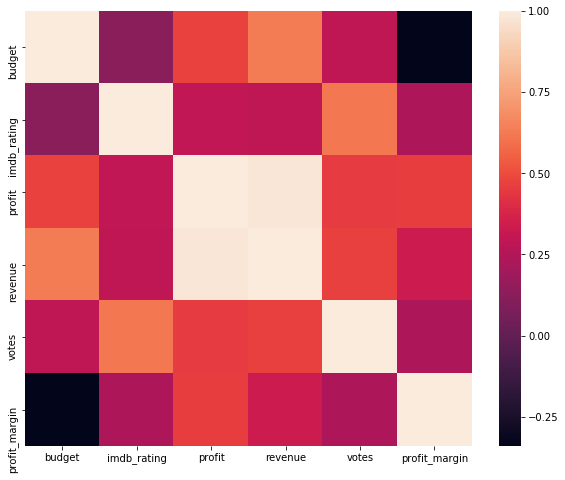

In [356]:
# correlation heatmap

f, ax = plt.subplots(figsize=(10, 8))
corr = all_df.corr()
sns.heatmap(corr,
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values)

In [759]:
# directors with profit in the top 90th percentile

directors = []
for i in all_movie_data:
    if i['profit_margin'] >= all_df.profit_margin.quantile(0.9):
        directors.append({'title': i['title'], 'directors': i['directors'], 'profit_margin': i['profit_margin']})

df_top_directors = pd.DataFrame(directors)
top_directors = df_top_directors.sort_values(by='profit_margin', ascending=False)
top_directors

,directors,profit_margin,title
14,Tod Williams,98.309974,Paranormal Activity 2
46,Jordan Peele,98.235414,Get Out
33,John R. Leonetti,97.471286,Annabelle
9,Marcus Dunstan,97.017544,The Collector
39,M. Night Shyamalan,96.767872,Split
23,Henry Joost,96.499041,Paranormal Activity 4
12,Tom Hooper,96.378662,The King's Speech
31,Josh Boone,96.093328,The Fault in Our Stars
11,Darren Aronofsky,96.034212,Black Swan
2,Danny Boyle,96.030807,Slumdog Millionaire


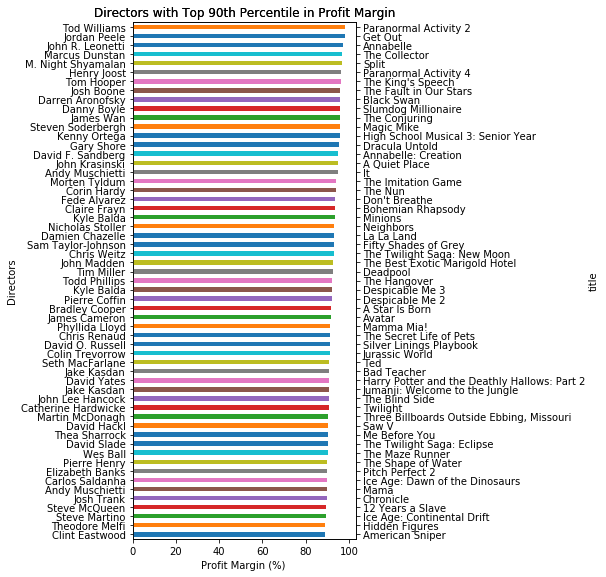

In [761]:
fig1 = top_directors.loc[:, ['directors', 'profit_margin']]
fig2 = top_directors.loc[:, ['title', 'profit_margin']]

sorted_fig1 = fig1.sort_values(by=['profit_margin'])
sorted_fig2 = fig2.sort_values(by=['profit_margin'])

fig, ax1 = plt.subplots(1,1)

sorted_fig1.plot(ax=ax1, y='profit_margin', x='directors', kind='barh', title='Directors with Top 90th Percentile in Profit Margin', figsize=(4,9.5), legend=False)

ax2 = ax1.twinx()

sorted_fig2.plot(ax=ax2, y='profit_margin', x='title', kind='barh', title='Directors with Top 90th Percentile in Profit Margin', figsize=(4,9.5), legend=False)

ax1.set_ylabel("Directors", fontsize=10)
ax1.set_xlabel("Profit Margin (%) ", fontsize=10)


plt.show()


In [752]:
revenue = []
for i in all_movie_data:
    if i['revenue'] >= all_df.revenue.quantile(0.9):
        revenue.append({'title': i['title'], 'directors': i['directors'], 'revenue': i['revenue']})

df_top_revenue = pd.DataFrame(revenue)
top_revenue = df_top_revenue.sort_values(by='revenue', ascending=False)
top_revenue

,directors,revenue,title
2,James Cameron,2787965087,Avatar
51,Joe Russo,2046239637,Avengers: Infinity War
28,Colin Trevorrow,1671713208,Jurassic World
14,Joss Whedon,1519557910,The Avengers
30,James Wan,1506249360,Furious 7
26,Joss Whedon,1405403694,Avengers: Age of Ultron
52,Ryan Coogler,1346739107,Black Panther
11,David Yates,1342000000,Harry Potter and the Deathly Hallows: Part 2
53,J. A. Bayona,1303459585,Jurassic World: Fallen Kingdom
10,Chris Buck,1274219009,Frozen


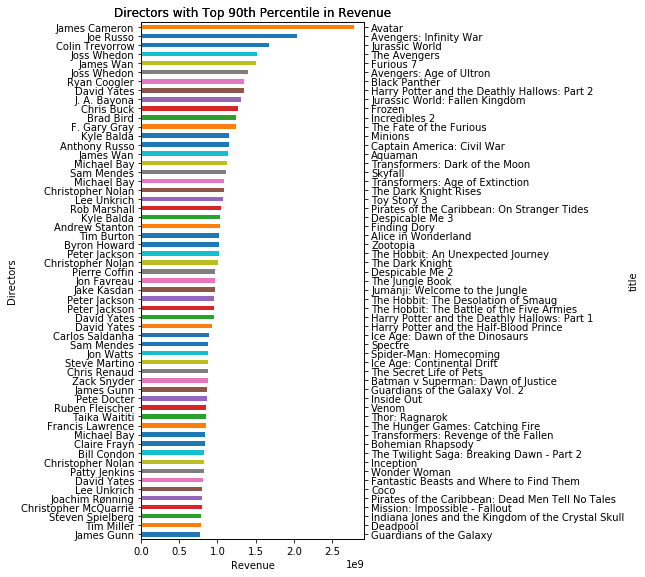

In [762]:
fig3 = top_revenue.loc[:, ['directors', 'revenue']]
fig4 = top_revenue.loc[:, ['title', 'revenue']]

sorted_fig3 = fig3.sort_values(by=['revenue'])
sorted_fig4 = fig4.sort_values(by=['revenue'])

fig, ax3 = plt.subplots(1,1)

sorted_fig3.plot(ax=ax3, y='revenue', x='directors', kind='barh', title='Directors with Top 90th Percentile in Revenue', figsize=(4,9.5), legend=False)

ax4 = ax3.twinx()

sorted_fig4.plot(ax=ax4, y='revenue', x='title', kind='barh', title='Directors with Top 90th Percentile in Revenue', figsize=(4,9.5), legend=False)

ax3.set_ylabel("Directors", fontsize=10)
ax3.set_xlabel("Revenue", fontsize=10)


plt.show()


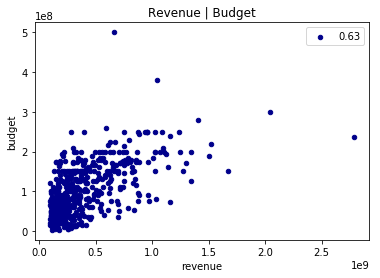

In [584]:
# as expected, revenue is highly correlated with budget
r = round(final_df['revenue'].corr(final_df['budget']), 2)
corr_rev_budget = final_df.plot.scatter(x='revenue', y='budget', c='DarkBlue', label=r, title = 'Revenue | Budget')

corr_rev_budget

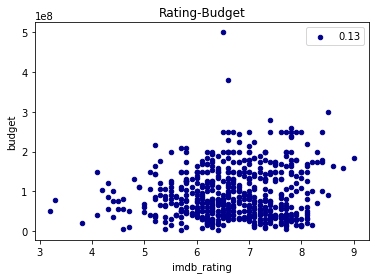

In [578]:
# in comparison, budget is not very correlated with ratings
r = round(final_df['imdb_rating'].corr(final_df['budget']), 2)
corr_rating_budget = final_df.plot.scatter(x='imdb_rating', y='budget', c='DarkBlue', label=r, title = 'Rating-Budget')

corr_rating_budget

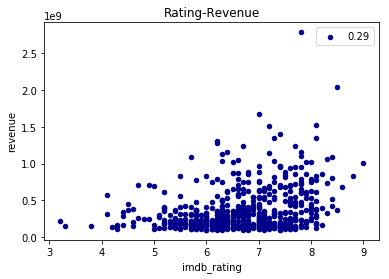

In [579]:
# and neither is revenue
r = round(final_df['imdb_rating'].corr(final_df['revenue']), 2)
corr_rating_rev = final_df.plot.scatter(x='imdb_rating', y='revenue', c='DarkBlue', label=r, title = 'Rating-Revenue')

corr_rating_rev

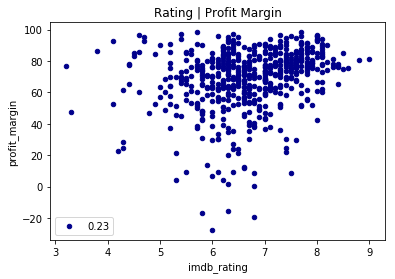

In [585]:
# hence it is expected that profit margin is not as correlated with ratings either
r = round(final_df['imdb_rating'].corr(final_df['profit_margin']), 2)
corr_rating_prof = final_df.plot.scatter(x='imdb_rating', y='profit_margin', c='DarkBlue', label=r, title = 'Rating | Profit Margin')

corr_rating_prof

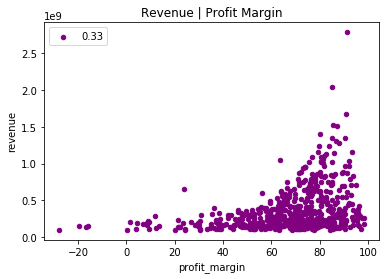

In [586]:
# next, we decide to see which is more indicative of higher profit margin, revenue or budget
r = round(final_df['revenue'].corr(final_df['profit_margin']), 2)
corr_rev_prof = final_df.plot.scatter(y='revenue', x='profit_margin', c='purple', label = r, title = 'Revenue | Profit Margin')

corr_rev_prof

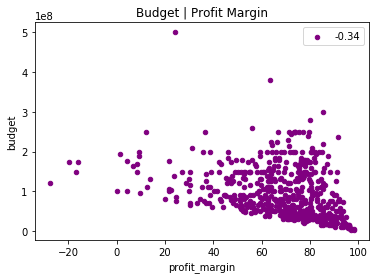

In [587]:
# seems like budget is a slightly better indicator of profit margin
r = round(final_df['budget'].corr(final_df['profit_margin']), 2)
corr_budget_prof = final_df.plot.scatter(y='budget', x='profit_margin', c='purple', label=r, title = 'Budget | Profit Margin')

corr_budget_prof

In [657]:
genre1 = final_df['revenue'].groupby(final_df['genre1']).mean()
genre1_rev = genre1.sort_values(ascending=False)

genre2 = final_df['revenue'].groupby(final_df['genre2']).mean()
genre2_rev = genre2.sort_values(ascending=False)

genre3 = final_df['revenue'].groupby(final_df['genre3']).mean()
genre3_rev = genre3.sort_values(ascending=False)


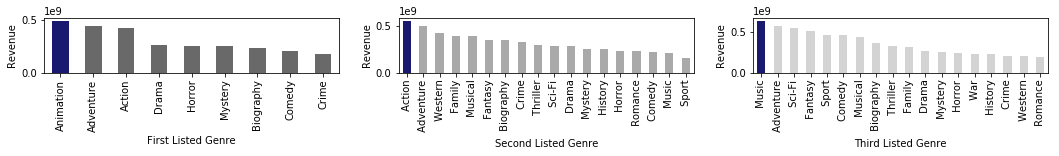

In [664]:
genre = plt.figure(figsize=(18, 1))

ax1 = genre.add_subplot(131)
ax2 = genre.add_subplot(132)
ax3 = genre.add_subplot(133)

genre1_rev.plot(kind='bar', color = 'dimgrey', ax=ax1)

genre2_rev.plot(kind='bar', color = 'darkgrey', ax=ax2)

genre3_rev.plot(kind='bar', color = 'lightgrey', ax=ax3)

ax1.set_xlabel("First Listed Genre")
ax1.set_ylabel('Revenue')

ax2.set_xlabel('Second Listed Genre')
ax2.set_ylabel('Revenue')

ax3.set_xlabel('Third Listed Genre')
ax3.set_ylabel('Revenue')

ax1.patches[0].set_facecolor('#191970')
ax2.patches[0].set_facecolor('#191970')
ax3.patches[0].set_facecolor('#191970')


plt.show()

# based on the below, we should recommend ACTION/ADVENTURE

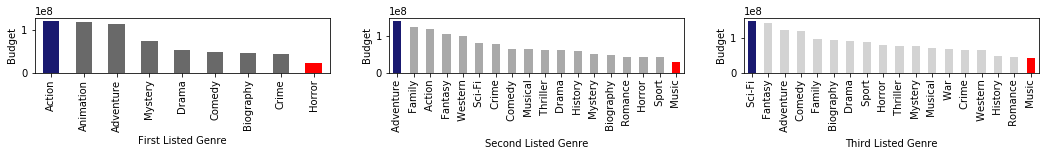

In [668]:
genre1 = final_df['budget'].groupby(final_df['genre1']).mean()
genre1_bud = genre1.sort_values(ascending=False)

genre2 = final_df['budget'].groupby(final_df['genre2']).mean()
genre2_bud = genre2.sort_values(ascending=False)

genre3 = final_df['budget'].groupby(final_df['genre3']).mean()
genre3_bud = genre3.sort_values(ascending=False)

genre = plt.figure(figsize=(18, 1))

ax1 = genre.add_subplot(131)
ax2 = genre.add_subplot(132)
ax3 = genre.add_subplot(133)

genre1_bud.plot(kind='bar', color = 'dimgrey', ax=ax1)

genre2_bud.plot(kind='bar', color = 'darkgrey', ax=ax2)

genre3_bud.plot(kind='bar', color = 'lightgrey', ax=ax3)

ax1.set_xlabel("First Listed Genre")
ax1.set_ylabel('Budget')

ax2.set_xlabel('Second Listed Genre')
ax2.set_ylabel('Budget')

ax3.set_xlabel('Third Listed Genre')
ax3.set_ylabel('Budget')

ax1.patches[0].set_facecolor('#191970')
ax1.patches[-1].set_facecolor('r')
ax2.patches[0].set_facecolor('#191970')
ax2.patches[-1].set_facecolor('r')
ax3.patches[0].set_facecolor('#191970')
ax3.patches[-1].set_facecolor('r')

plt.show()

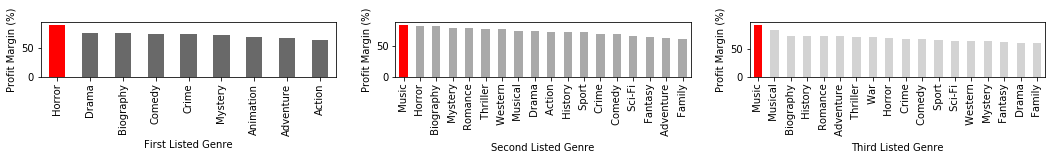

In [669]:
genre1 = final_df['profit_margin'].groupby(final_df['genre1']).mean()
genre1_prof = genre1.sort_values(ascending=False)

genre2 = final_df['profit_margin'].groupby(final_df['genre2']).mean()
genre2_prof = genre2.sort_values(ascending=False)

genre3 = final_df['profit_margin'].groupby(final_df['genre3']).mean()
genre3_prof = genre3.sort_values(ascending=False)

genre = plt.figure(figsize=(18, 1))

ax1 = genre.add_subplot(131)
ax2 = genre.add_subplot(132)
ax3 = genre.add_subplot(133)

genre1_prof.plot(kind='bar', color = 'dimgrey', ax=ax1)

genre2_prof.plot(kind='bar', color = 'darkgrey', ax=ax2)

genre3_prof.plot(kind='bar', color = 'lightgrey', ax=ax3)

ax1.set_xlabel("First Listed Genre")
ax1.set_ylabel('Profit Margin (%)')

ax2.set_xlabel('Second Listed Genre')
ax2.set_ylabel('Profit Margin (%)')

ax3.set_xlabel('Third Listed Genre')
ax3.set_ylabel('Profit Margin (%)')

ax1.patches[0].set_facecolor('r')
ax2.patches[0].set_facecolor('r')
ax3.patches[0].set_facecolor('r')

plt.show()

In [678]:
dir_genre = final_df.loc[:, ['directors', 'title', 'genre1', 'genre2', 'genre3']]
dir_genre_cross = pd.merge(top_directors, dir_genre, on='title')
director_genres = dir_genre_cross.drop(columns=['directors_x', 'profit_margin'])
director_genres

,title,directors_y,genre1,genre2,genre3
0,Paranormal Activity 2,Tod Williams,Horror,None,None
1,Get Out,Jordan Peele,Horror,Mystery,Thriller
2,Annabelle,John R. Leonetti,Horror,Mystery,Thriller
3,The Collector,Marcus Dunstan,Horror,Thriller,None
4,Split,M. Night Shyamalan,Horror,Thriller,None
5,Paranormal Activity 4,Henry Joost,Horror,Mystery,Thriller
6,The King's Speech,Tom Hooper,Biography,Drama,History
7,The Fault in Our Stars,Josh Boone,Drama,Romance,None
8,Black Swan,Darren Aronofsky,Drama,Thriller,None
9,Slumdog Millionaire,Danny Boyle,Drama,Romance,None


In [700]:
directors = director_genres.drop(columns=['title'])
directors

,directors_y,genre1,genre2,genre3
0,Tod Williams,Horror,None,None
1,Jordan Peele,Horror,Mystery,Thriller
2,John R. Leonetti,Horror,Mystery,Thriller
3,Marcus Dunstan,Horror,Thriller,None
4,M. Night Shyamalan,Horror,Thriller,None
5,Henry Joost,Horror,Mystery,Thriller
6,Tom Hooper,Biography,Drama,History
7,Josh Boone,Drama,Romance,None
8,Darren Aronofsky,Drama,Thriller,None
9,Danny Boyle,Drama,Romance,None


In [791]:
gb = final_df.groupby(['directors','genre1'])
result = gb['directors'].count().sort_values(ascending=False)
genre1 = pd.DataFrame(result)
pd.options.display.max_rows=500
genre1

,,directors
directors,genre1,
Dennis Dugan,Comedy,5
David Yates,Adventure,5
Carlos Saldanha,Animation,4
Francis Lawrence,Action,4
Michael Bay,Action,4
Christopher Nolan,Action,4
Roland Emmerich,Action,4
Antoine Fuqua,Action,4
Brad Peyton,Action,4


In [792]:
gb = final_df.groupby(['directors','genre2'])
result = gb['directors'].count().sort_values(ascending=False)
genre2 = pd.DataFrame(result)
genre2

,,directors
directors,genre2,
Michael Bay,Adventure,4
Roland Emmerich,Adventure,3
Guy Ritchie,Adventure,3
Mike Mitchell,Adventure,3
David Yates,Family,3
Francis Lawrence,Adventure,3
Paul Feig,Comedy,3
Marc Forster,Adventure,3
Peter Jackson,Fantasy,3


In [793]:
gb = final_df.groupby(['directors','genre3'])
result = gb['directors'].count().sort_values(ascending=False)
genre3 = pd.DataFrame(result)
genre3

,,directors
directors,genre3,
David Yates,Fantasy,4
Michael Bay,Sci-Fi,4
Christopher McQuarrie,Thriller,3
Shawn Levy,Family,3
Francis Lawrence,Sci-Fi,3
Mike Mitchell,Comedy,3
Carlos Saldanha,Comedy,3
Kelly Asbury,Comedy,2
Ron Clements,Comedy,2
